In [49]:
#Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

In [3]:
pd.set_option('Display.max_rows',None)

In [4]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

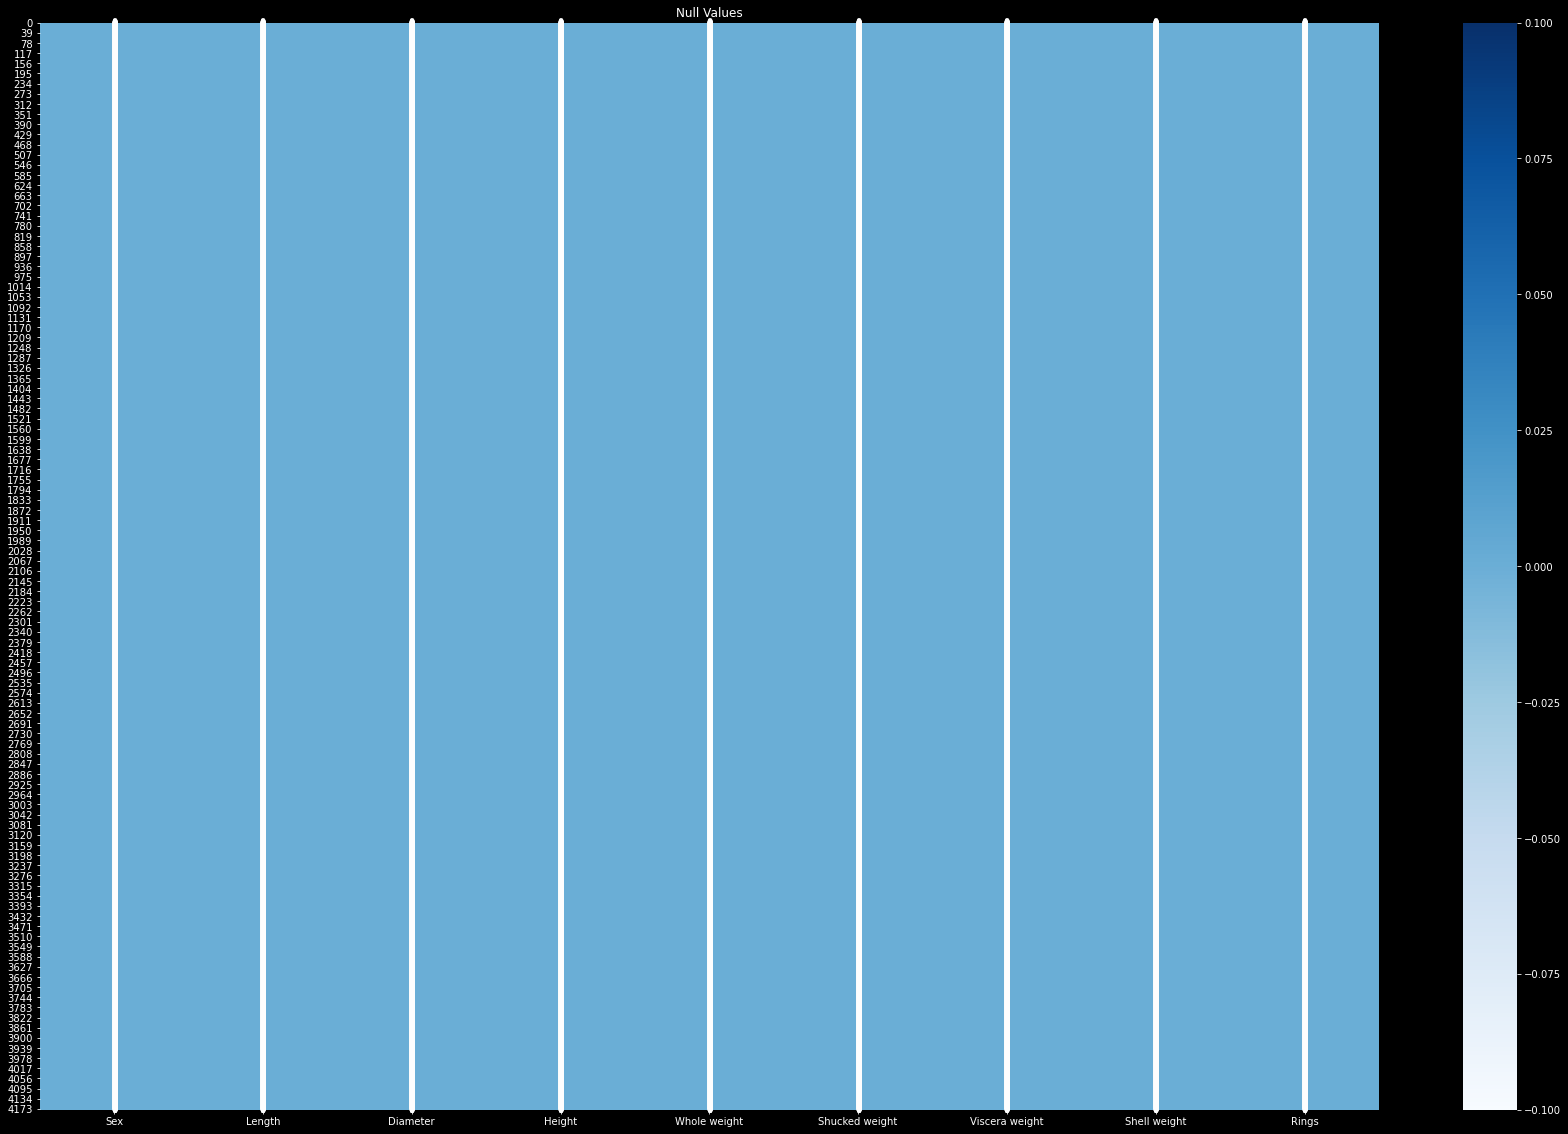

In [9]:
plt.figure(figsize=[30,20])
sns.heatmap(df.isnull(),cmap='Blues',linecolor='green',annot=True)
plt.title('Null Values')
plt.show()

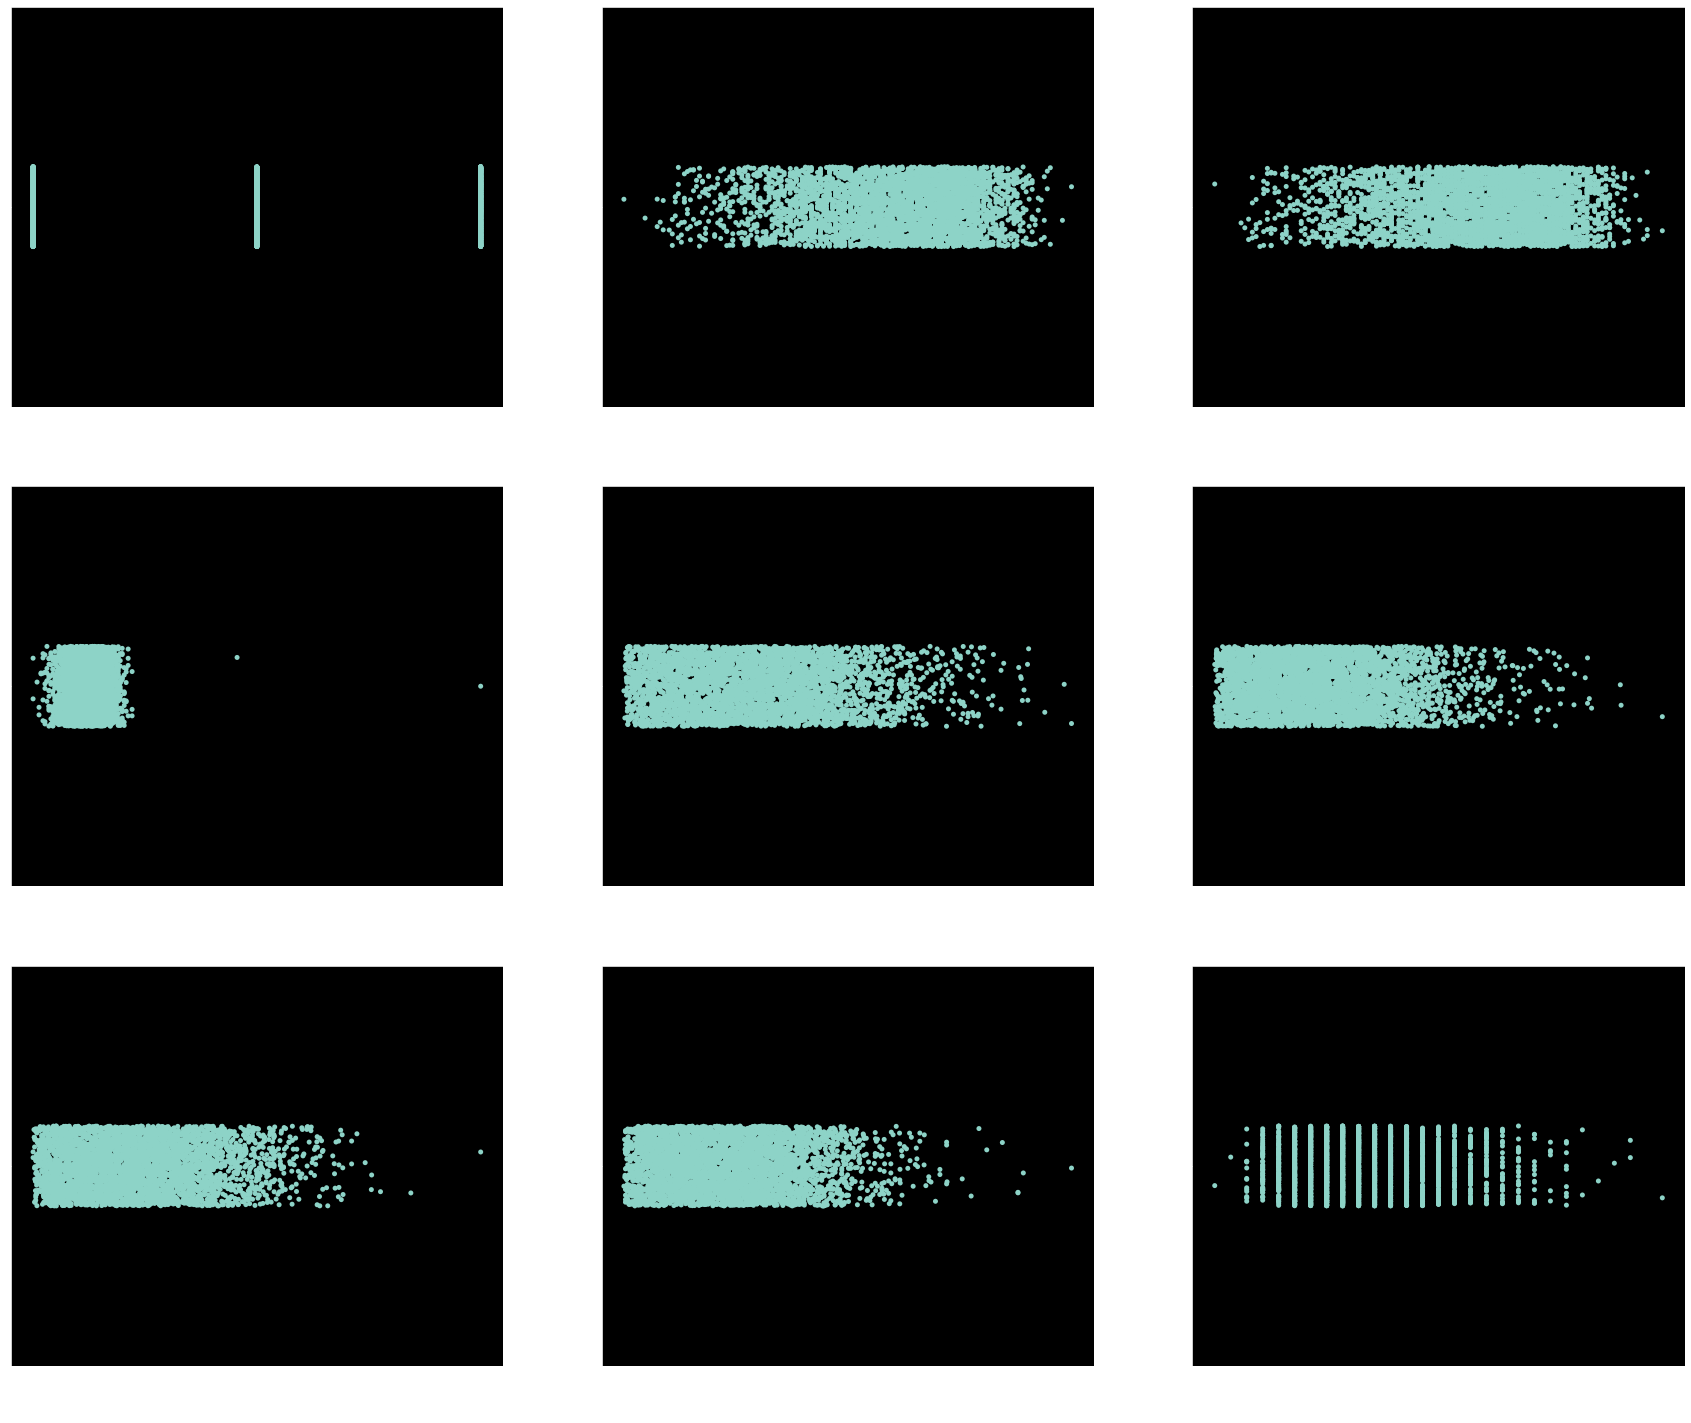

In [10]:
plt.figure(figsize=(30,25),facecolor="white")
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax =plt.subplot(3,3,plotnumber)
        sns.stripplot(df[column])
        plt.xlabel(column,fontsize=30)
        
    plotnumber+=1
plt.show()

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

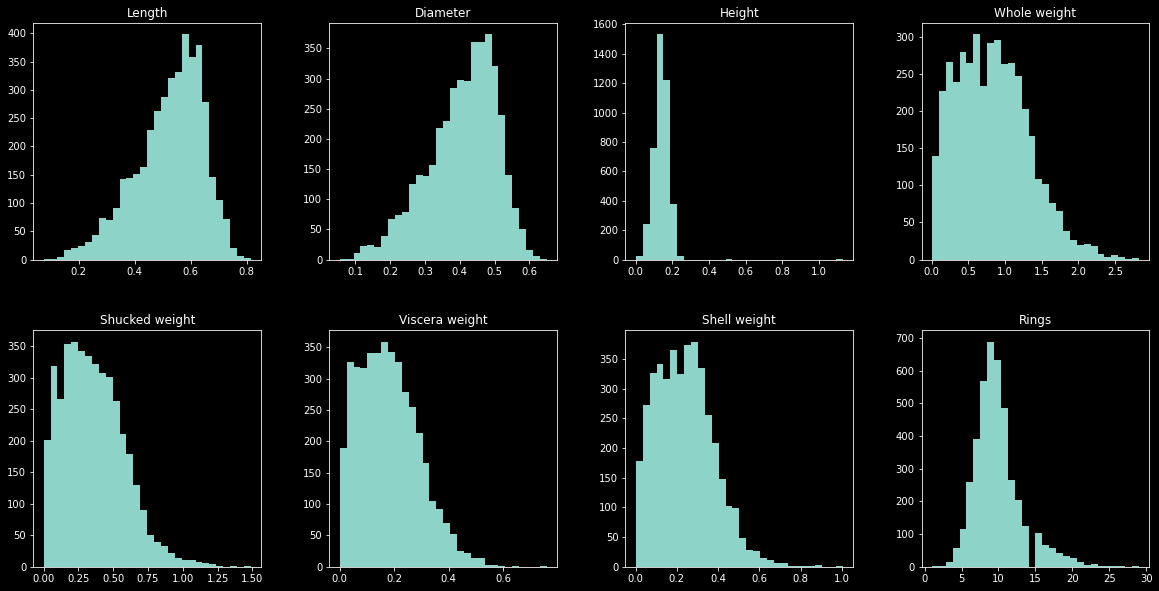

In [11]:
df.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

In [12]:
df['age'] = df['Rings']+1.5
df = df.drop('Rings', axis = 1)

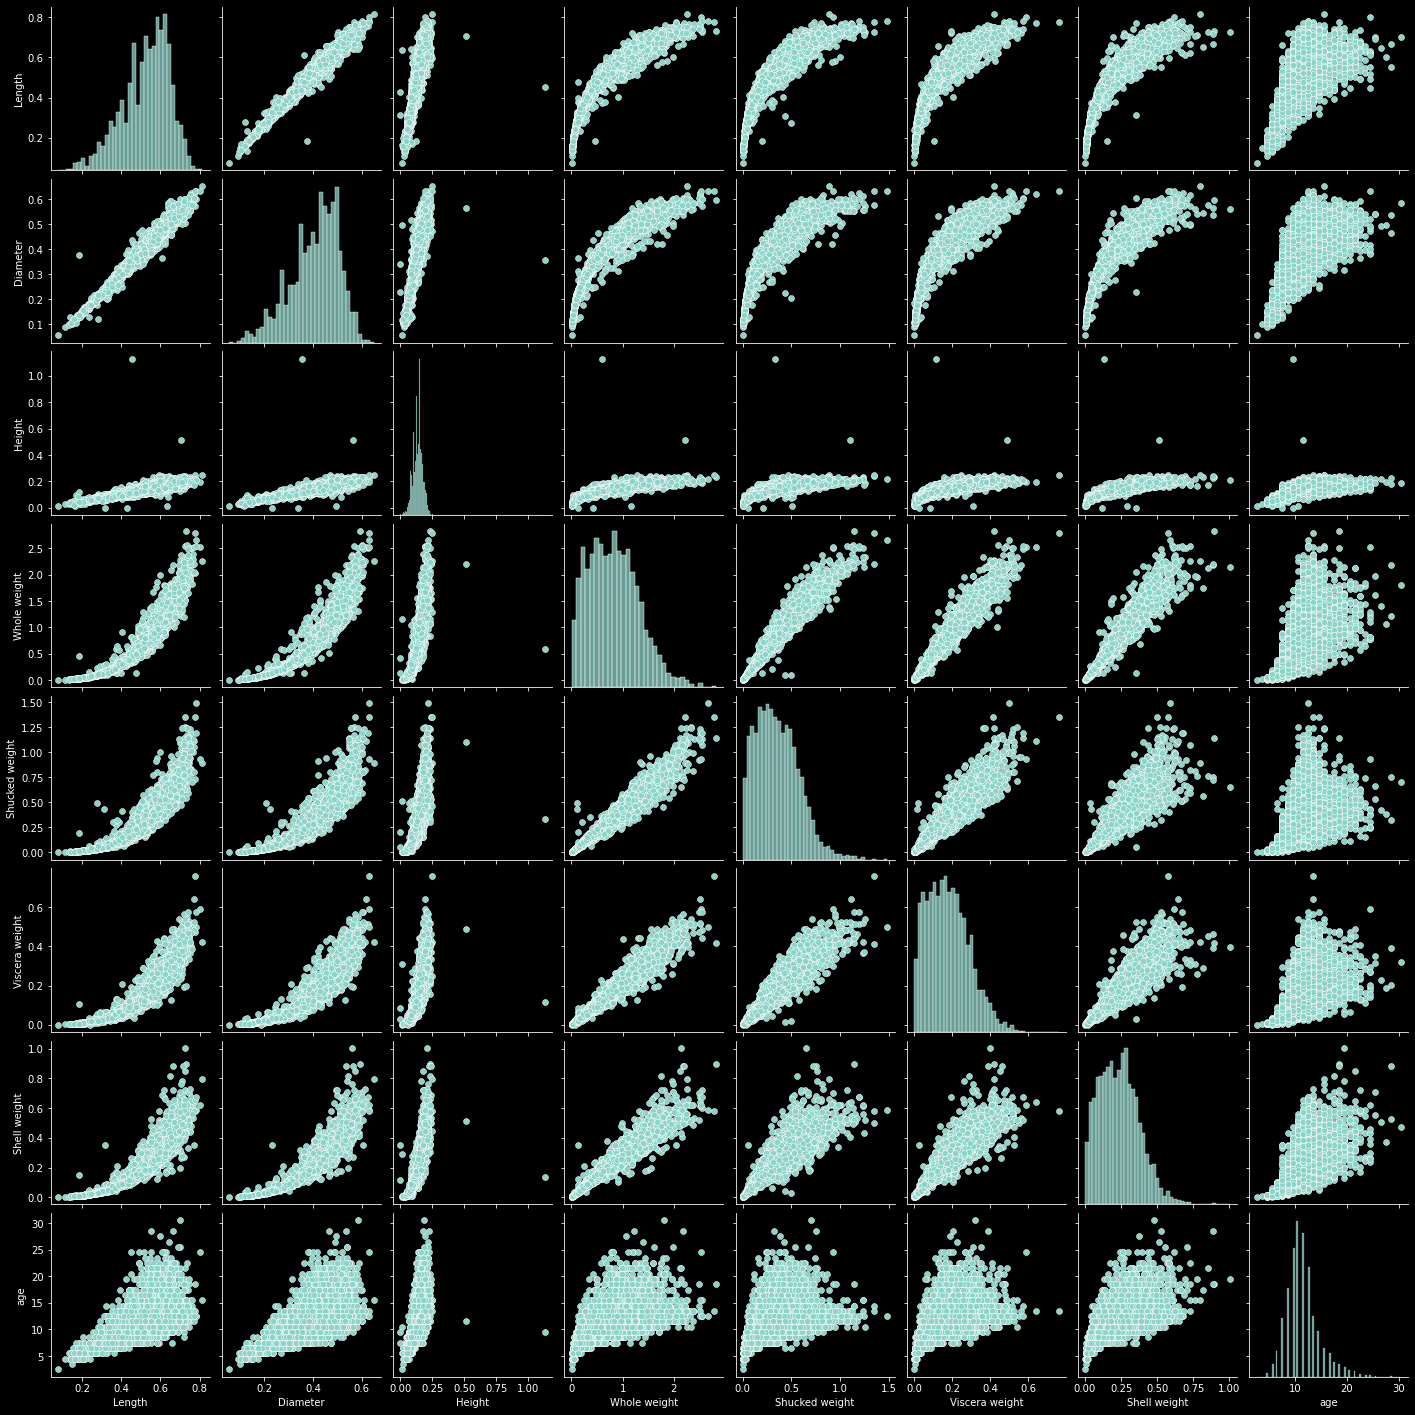

In [13]:
sns.pairplot(df)

In [14]:
int_= df.select_dtypes(include = [np.number]).columns
obj_= df.select_dtypes(include = [np.object]).columns

In [15]:
int_

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [16]:
obj_

Index(['Sex'], dtype='object')

<AxesSubplot:>

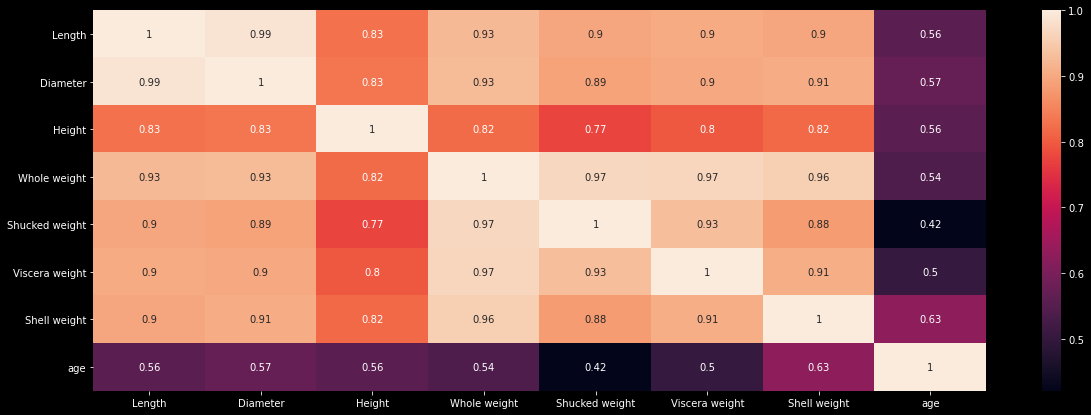

In [18]:
plt.figure(figsize = (20,7))
sns.heatmap(df[int_].corr(),annot = True)

<AxesSubplot:xlabel='Sex', ylabel='count'>

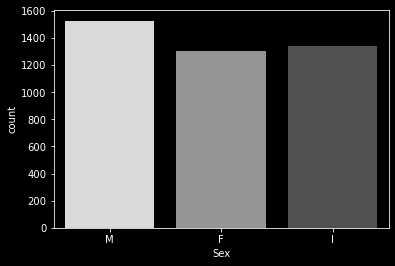

In [21]:
sns.countplot(x = 'Sex', data = df, palette = 'Greys')

<AxesSubplot:xlabel='Sex', ylabel='age'>

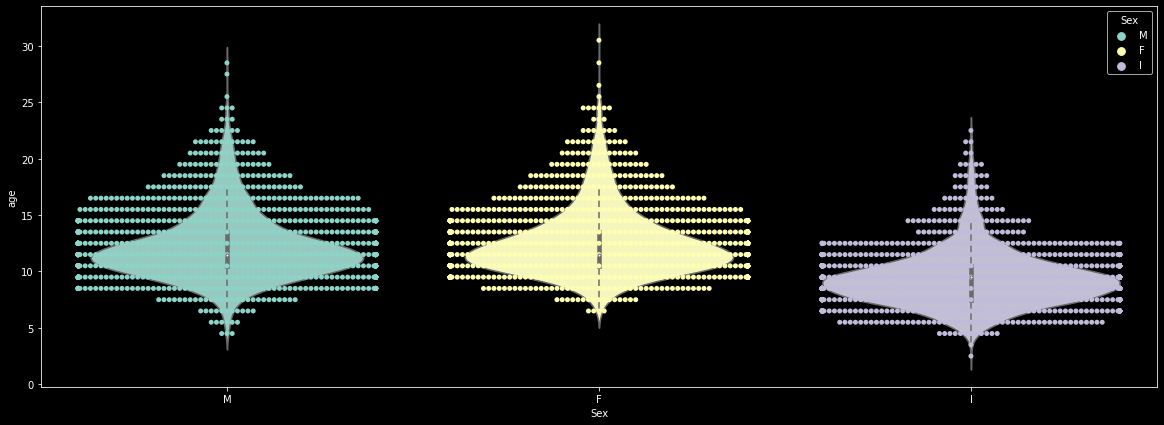

In [22]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'age', data = df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'age',data = df)

In [24]:
df= pd.get_dummies(df)
dummy_df = df

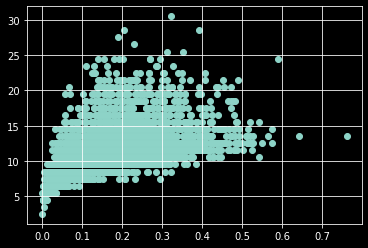

In [25]:
v= 'Viscera weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [26]:
df.drop(df[(df['Viscera weight'] > 0.5) &
          (df['age'] < 20)].index, inplace = True)
df.drop(df[(df['Viscera weight']<0.5) & (
df['age'] > 25)].index, inplace = True)

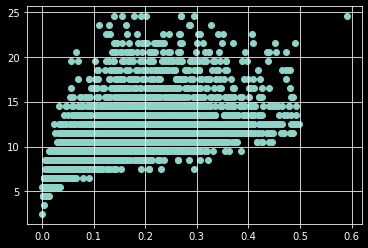

In [27]:
v = 'Shell weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [32]:
df.drop(df[(df['Shell weight'] > 0.6) &
          (df['age'] < 25)].index, inplace = True)
df.drop(df[(df['Shell weight']<0.8) & (
df['age'] > 25)].index, inplace = True)

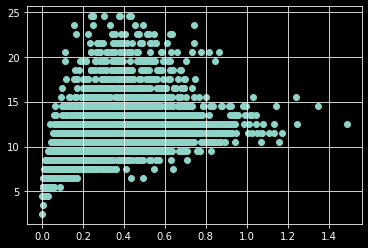

In [34]:
v= 'Shucked weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [35]:
df.drop(df[(df['Shucked weight'] >= 1) &
          (df['age'] < 20)].index, inplace = True)
df.drop(df[(df['Viscera weight']<1) & (
df['age'] > 20)].index, inplace = True)

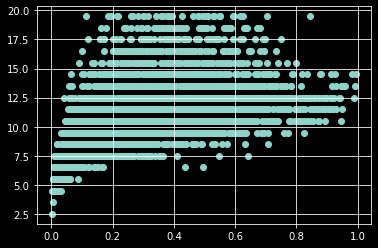

In [36]:
v= 'Whole weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [37]:
df.drop(df[(df['Whole weight'] >= 2.5) &
          (df['age'] < 25)].index, inplace = True)
df.drop(df[(df['Whole weight']<2.5) & (
df['age'] > 25)].index, inplace = True)

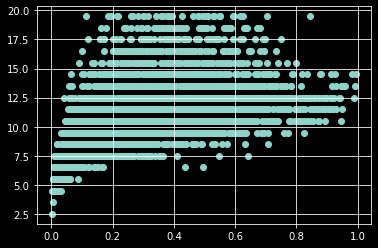

In [38]:
v='Diameter'
plt.scatter(x=df[var],y=df['age'])
plt.grid(True)

In [40]:
df.drop(df[(df['Diameter']>=0.5)&
          (df['age']<6)].index,inplace=True)
df.drop(df[(df['Diameter']<0.1)&
       (df['age']>6)].index,inplace=True)

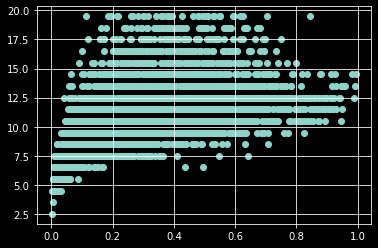

In [41]:
v='Height'
plt.scatter(x=df[var],y=df['age'])
plt.grid(True)

In [44]:
df.drop(df[(df['Height']>=0.5)&
          (df['age']<5)].index,inplace=True)
df.drop(df[(df['Height']<0.1)&
          (df['age']>20)].index,inplace=True)

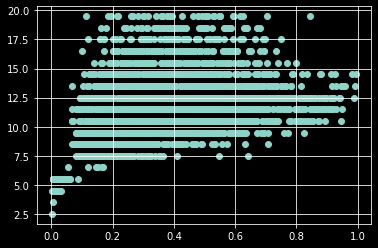

In [43]:
v='Length'
plt.scatter(x=df[var],y=df['age'])
plt.grid(True)

In [45]:
df.drop(df[(df['Length'] <0.1) &
          (df['age'] < 5)].index, inplace = True)
df.drop(df[(df['Length']<0.8) & (
df['age'] > 25)].index, inplace = True)
df.drop(df[(df['Length']>=0.8) & (
df['age'] < 25)].index, inplace = True)

In [47]:
x = df.drop('age', axis = 1)
y = df['age']

In [51]:
scalar = StandardScaler()
scalar.fit_transform(x)
skb= SelectKBest()
x_new = skb.fit_transform(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.25)

In [55]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [56]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [57]:
 from sklearn.metrics import mean_absolute_error, mean_squared_error
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

Mean Squared error of training set :3.741953
Mean Squared error of testing set :4.588242


In [58]:
from sklearn.metrics import r2_score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

R2 Score of training set:0.46
R2 Score of testing set:0.35


In [60]:
svr = SVR(kernel = 'linear')
svr.fit(x_train, y_train)
svr.fit(x_test, y_test)

SVR(kernel='linear')

In [61]:
y_train_pred = svr.predict(x_train)
y_test_pred = svr.predict(x_test)

svr.score(x_train, y_train)

0.33979771971425843

In [62]:
svr.score(x_test, y_test)

0.29697351673014705

In [63]:
rf = RandomForestRegressor()

In [65]:
rf.fit(x_train, y_train)
rf.fit(x_test, y_test)

RandomForestRegressor()

In [67]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

rf.score(x_train, y_train)

0.43497814955199143

In [68]:
rf.score(x_test, y_test)

0.9198048171263978

In [70]:
knn = KNeighborsRegressor(n_neighbors =4 )
knn.fit(x_train, y_train)
knn.fit(x_test, y_test)

KNeighborsRegressor(n_neighbors=4)

In [71]:
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)
knn.score(x_train, y_train)

0.3533361145222458

In [72]:
knn.score(x_test, y_test)

0.6088654475093187

In [81]:
from sklearn.model_selection import  GridSearchCV
parameters={'n_estimators':[10,100],
           'max_features':['auto','log2','sqrt'],
           'max_depth':[3,4,5,6,7],
           'ccp_alpha':[1,2,3,4,5]}

In [83]:
gsc=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [89]:
gsc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'ccp_alpha': [1, 2, 3, 4, 5],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [10, 100]})

In [90]:
gsc.best_params_

{'ccp_alpha': 1, 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 100}

In [92]:
mod=RandomForestRegressor(ccp_alpha=1,max_depth=7,max_features='auto',n_estimators=100)

In [95]:
mod.fit(x_train,y_train)

RandomForestRegressor(ccp_alpha=1, max_depth=7)